In [1]:
# import libraries
import os
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')
import seaborn as sns
# for creating a responsive plot
# %matplotlib widget

In [2]:
# variables
folder = f"C:/Users/anani/Downloads/Projects 2021_22/Code"
sys.path.append(folder)
from utils import reduce_pca, reduce_tsne, reduce_umap, plot_instance_space_2d
from clustering import kmeans_tuning, avg_silhouette_score_plot, sample_silhouette_score_plot, kmeans_distorsion, kmeans

In [3]:
experiment = "experiment_2"

In [4]:
# define directories
project_folder = f"C:/Users/anani/Downloads/Projects 2021_22/generalisability_index"
data_folder= f"{project_folder}/Data/preprocessed/{experiment}"

clustering_folder = f"{project_folder}/Results/{experiment}/clustering"
os.makedirs(clustering_folder, exist_ok=True)

In [5]:
# concat all datasets

# create a placeholder
features = pd.DataFrame()

for suite in ["BS1", "BS2", "BS3", "BS4", "BS5"]:
    
    features_temp = pd.read_csv(f"{data_folder}/suite={suite}_features.csv")
    features_temp["benchmark_suite"] = suite
    features_temp = features_temp.set_index( ["f0", "f1", "alpha", "benchmark_suite"])
    
    features = pd.concat([features, features_temp], axis=0)

In [6]:
features.head()

ela_distr.skewness  \
f0                f1                        alpha    benchmark_suite                       
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                        1.123652   
                                            0.868363 BS1                        1.453263   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                        1.658258   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                        0.585470   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                        0.981722   

                                                                      ela_meta.lin_simple.adjr2  \
f0                f1                        alpha    benchmark_suite                              
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                               0.006560   
                                            0.868363 BS1                               0.009771   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                               0.601748   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                               0.575691   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                               0.423610   

                                                                      ela_meta.lin_simple.intercept  \
f0                f1                        alpha    benchmark_suite                                  
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                                 -43.664781   
                                            0.868363 BS1                                 -17.798967   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                                  74.948907   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                                  -3.028322   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                                 -16.206055   

                                                                      ela_meta.lin_simple.coef_max  \
f0                f1                        alpha    benchmark_suite                                 
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                                  7.454908   
                                            0.868363 BS1                                  7.430297   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                                 86.395526   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                                  8.368102   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                                 14.222290   

                                                                      ela_meta.quad_simple.adjr2  \
f0                f1                        alpha    benchmark_suite                               
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                                0.758831   
                                            0.868363 BS1                                0.733708   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                                0.853627   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                                0.937452   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                                0.849154   

                                                                      ela_meta.quad_simple.coef.min_by_max  \
f0                f1                        alpha    benchmark_suite                                         
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                                          0.018924   
                                            0.868363 BS1                                          0.017029   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                                          0.050809   
                  shifted-bbob_f023_i01_d05

In [7]:
features.shape

(277, 14)

In [8]:
# preprocess data
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), index = features.index, columns=features.columns.tolist())
features.head()

ela_distr.skewness  \
f0                f1                        alpha    benchmark_suite                       
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                       -0.138283   
                                            0.868363 BS1                        0.069438   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                        0.198626   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                       -0.477445   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                       -0.227727   

                                                                      ela_meta.lin_simple.adjr2  \
f0                f1                        alpha    benchmark_suite                              
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                              -1.062102   
                                            0.868363 BS1                              -1.048651   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                               1.430884   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                               1.321741   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                               0.684740   

                                                                      ela_meta.lin_simple.intercept  \
f0                f1                        alpha    benchmark_suite                                  
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                                  -0.060362   
                                            0.868363 BS1                                  -0.060360   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                                  -0.060355   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                                  -0.060359   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                                  -0.060360   

                                                                      ela_meta.lin_simple.coef_max  \
f0                f1                        alpha    benchmark_suite                                 
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                                 -0.060322   
                                            0.868363 BS1                                 -0.060322   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                                 -0.060310   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                                 -0.060322   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                                 -0.060321   

                                                                      ela_meta.quad_simple.adjr2  \
f0                f1                        alpha    benchmark_suite                               
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                                0.591033   
                                            0.868363 BS1                                0.510489   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                                0.894952   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                                1.163693   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                                0.880609   

                                                                      ela_meta.quad_simple.coef.min_by_max  \
f0                f1                        alpha    benchmark_suite                                         
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                                         -0.664933   
                                            0.868363 BS1                                         -0.697023   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                                         -0.125021   
                  shifted-bbob_f023_i01_d05

Preview data PCA:
                  f0                         f1     alpha benchmark_suite  \
0  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.895461             BS1   
1  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.868363             BS1   
2  bbob_f003_i01_d05  shifted-bbob_f009_i01_d05  0.001103             BS1   
3  bbob_f003_i01_d05  shifted-bbob_f023_i01_d05  0.785410             BS1   
4  bbob_f017_i01_d05  shifted-bbob_f003_i01_d05  0.345955             BS1   

       dim0      dim1  
0  1.492047  0.431074  
1  1.605006  0.539435  
2  2.608169 -1.027756  
3  0.779885 -2.012823  
4  1.480909 -1.370223  
(277, 6)
Pca explained_variance_:  [5.08034162 3.30573668]
Pca explained_variance_ratio_:  [0.3615715  0.23527162]
Pca explained_variance_ratio  sum:  0.5968431179636424


C:\Users\anani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\anani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Preview data TSNE: 
                  f0                         f1     alpha benchmark_suite  \
0  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.895461             BS1   
1  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.868363             BS1   
2  bbob_f003_i01_d05  shifted-bbob_f009_i01_d05  0.001103             BS1   
3  bbob_f003_i01_d05  shifted-bbob_f023_i01_d05  0.785410             BS1   
4  bbob_f017_i01_d05  shifted-bbob_f003_i01_d05  0.345955             BS1   

        dim0       dim1  
0   6.241772   7.662531  
1   6.358421   7.717513  
2  12.875506   6.097454  
3  13.388949  11.368115  
4   9.637888   5.041445  
(277, 6)
Preview data UMAP: 
                  f0                         f1     alpha benchmark_suite  \
0  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.895461             BS1   
1  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.868363             BS1   
2  bbob_f003_i01_d05  shifted-bbob_f009_i01_d05  0.001103             BS1   
3  bbob_f003_i01_d05  sh

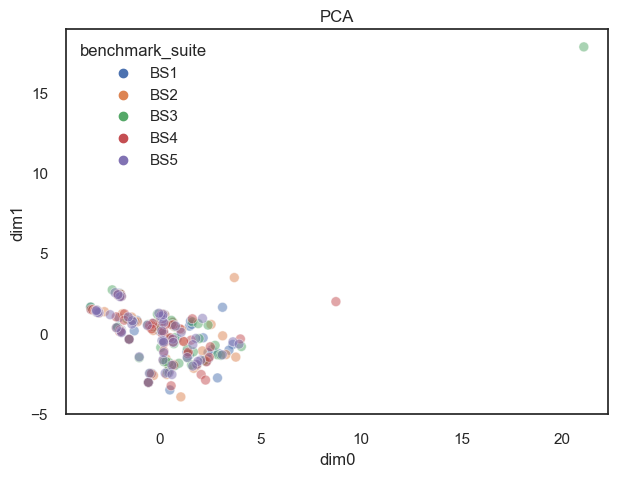

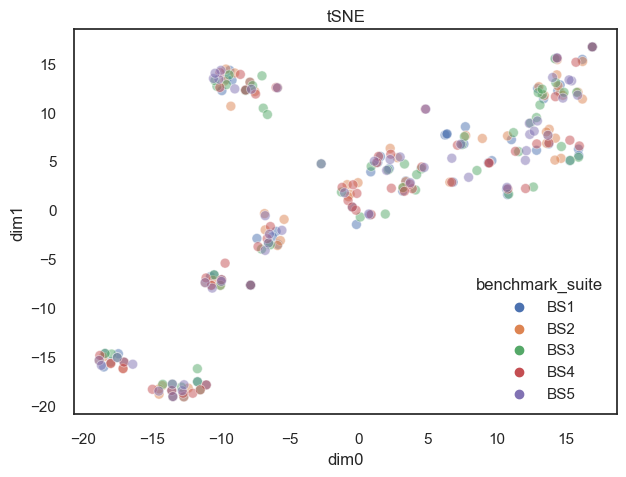

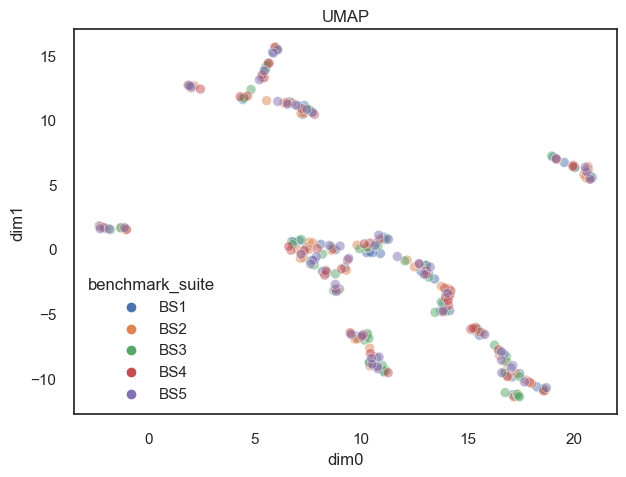

In [22]:
# dimensionality reduction to 2D
pca, data_2d_pca = reduce_pca(features, n_components=2
                     , title=f"features_2d_pca"
                     , save_path=f"{clustering_folder}")

tsne, data_2d_tsne = reduce_tsne(features, n_components=2, n_iter=1000, perplexity=30.0
                          , title=f"features_2d_tsne"
                          , save_path=f"{clustering_folder}")

umap, data_2d_umap = reduce_umap(features, n_components=2, n_neighbors=10
                           , min_dist=0.3, metric="cosine"
                          , title=f"features_2d_umap"
                          , save_path=f"{clustering_folder}")
 
# concat into a list
data_2ds = [data_2d_pca, data_2d_tsne, data_2d_umap]
labels = ["PCA", "tSNE", "UMAP"]

# plot ELA representation of problems in 2D using all dim reduction techniques
for k in range(len(data_2ds)):

    # scatterplot 2d
    sns.set()
    sns.set_theme(style='white', font_scale=1)
    plt.figure(figsize=(7, 5))
    
    sns.scatterplot(data=data_2ds[k], x="dim0", y="dim1", hue="benchmark_suite", alpha=0.5, s = 50)

    # annotate
#     for line in range(0, data_2ds[k].shape[0]):
#         text = plt.annotate(str(data.loc[line, "f_id"]), (data.dim0[line] + 0.01, data.dim1[line])) #, fontsize=10
#         text.set_alpha(.6)
    plt.title(labels[k])
    plt.savefig(f"{clustering_folder}/features_2d_{labels[k]}.png", bbox_inches='tight', dpi=300)

    plt.show()
#     plt.close()

Preview data PCA:
                  f0                         f1     alpha benchmark_suite  \
0  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.895461             BS1   
1  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.868363             BS1   
2  bbob_f003_i01_d05  shifted-bbob_f009_i01_d05  0.001103             BS1   
3  bbob_f003_i01_d05  shifted-bbob_f023_i01_d05  0.785410             BS1   
4  bbob_f017_i01_d05  shifted-bbob_f003_i01_d05  0.345955             BS1   

       dim0      dim1      dim2  
0  1.492047  0.431074 -0.277840  
1  1.605006  0.539435 -0.239342  
2  2.608169 -1.027756  0.645787  
3  0.779885 -2.012823  0.820161  
4  1.480909 -1.370223 -0.088441  
(277, 7)
Pca explained_variance_:  [5.08034162 3.30573668 1.96477167]
Pca explained_variance_ratio_:  [0.3615715  0.23527162 0.13983419]
Pca explained_variance_ratio  sum:  0.7366773057684536


C:\Users\anani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\anani\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Preview data TSNE: 
                  f0                         f1     alpha benchmark_suite  \
0  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.895461             BS1   
1  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.868363             BS1   
2  bbob_f003_i01_d05  shifted-bbob_f009_i01_d05  0.001103             BS1   
3  bbob_f003_i01_d05  shifted-bbob_f023_i01_d05  0.785410             BS1   
4  bbob_f017_i01_d05  shifted-bbob_f003_i01_d05  0.345955             BS1   

        dim0       dim1       dim2  
0  13.881079  12.417768 -13.406197  
1  -1.032912 -34.564770 -12.893900  
2  49.574055   7.634975  -3.414600  
3  31.878820  -9.834146  21.451567  
4  20.607466 -15.717897  -1.239570  
(277, 7)
Preview data UMAP: 
                  f0                         f1     alpha benchmark_suite  \
0  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.895461             BS1   
1  bbob_f004_i01_d05  shifted-bbob_f003_i01_d05  0.868363             BS1   
2  bbob_f003_i01_d05  shifted-bbob_

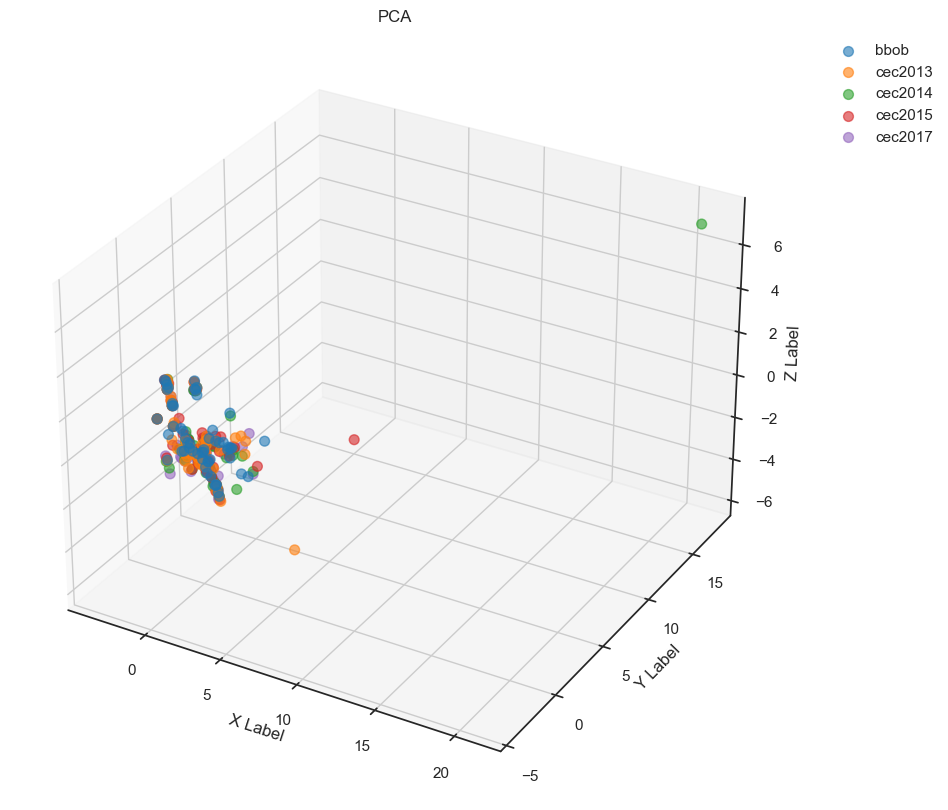

BS1
BS2
BS3
BS4
BS5


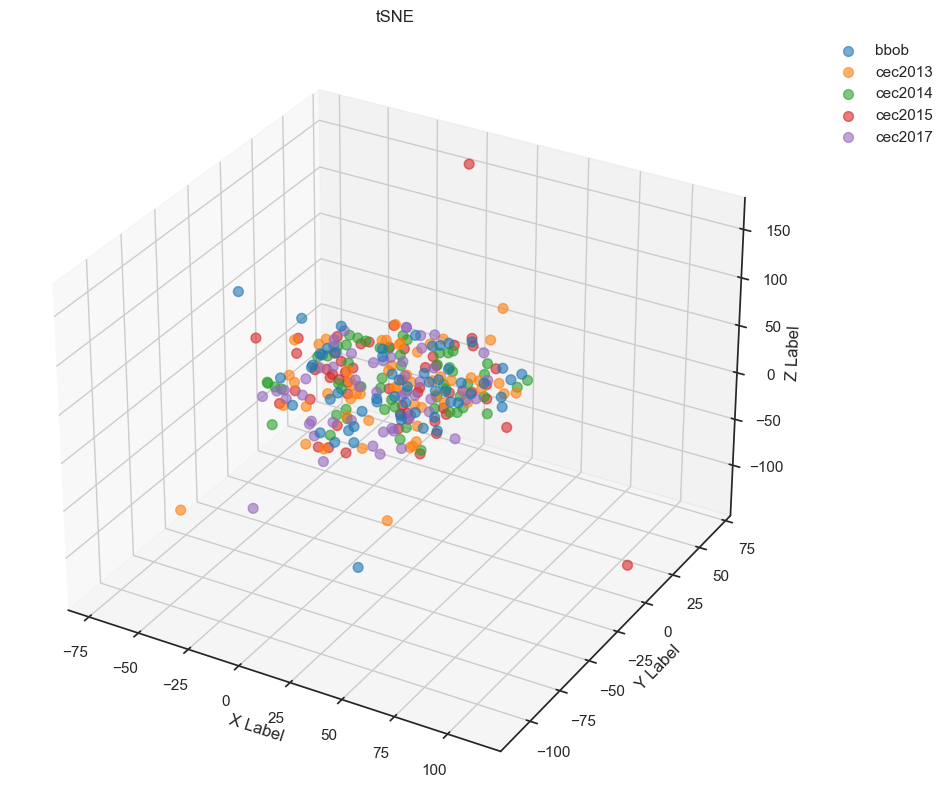

BS1
BS2
BS3
BS4
BS5


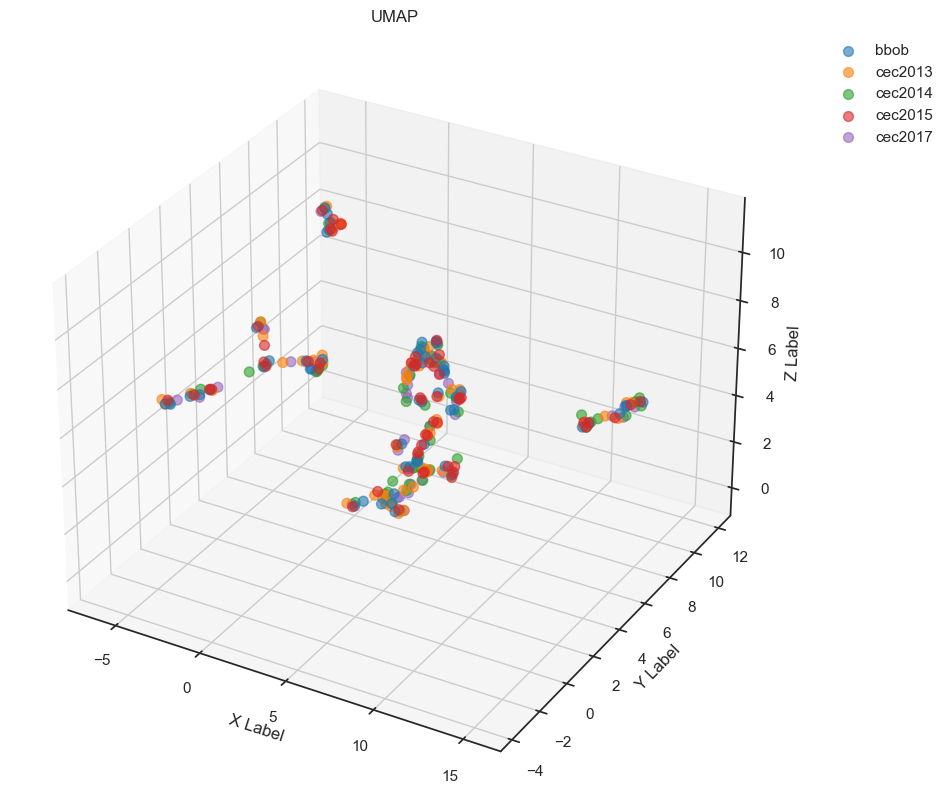

In [10]:
# dimensionality reduction to 3D
pca, data_3d_pca = reduce_pca(features, n_components=3
                     , title=f"features_3d_pca"
                     , save_path=f"{clustering_folder}")

tsne, data_3d_tsne = reduce_tsne(features, n_components=3, perplexity=10, n_iter=500
                          , title=f"features_3d_tsne"
                          , save_path=f"{clustering_folder}")
 

umap, data_3d_umap = reduce_umap(features, n_components=3, n_neighbors=15
                           , min_dist=0.3, metric="cosine"
                          , title=f"features_3d_umap"
                          , save_path=f"{clustering_folder}")
 
# concat into a list
data_3ds = [data_3d_pca, data_3d_tsne, data_3d_umap]
data_labels = ["PCA", "tSNE", "UMAP"];
labels = ['bbob', 'cec2013', 'cec2014', 'cec2015', 'cec2017']
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]

# plot
for k in range(len(data_3ds)):
    
    data = data_3ds[k]
    
    # scatterplot 2d
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection='3d')
    ax.grid()

    # plot
    for i, suite in enumerate(data["benchmark_suite"].unique()):
        print(suite)
        
        data_temp = data[data["benchmark_suite"]==suite].reset_index()
        
        x = data_temp["dim0"].values
        y = data_temp["dim1"].values
        z = data_temp["dim2"].values

        ax.scatter(x, y, z, s=50,  marker='o', c=colors[i], label=labels[i], alpha=0.6)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.set_title(data_labels[k])
    
    # legend
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2)
    
    # save
    plt.savefig(f"{clustering_folder}/features_3d_{data_labels[k]}.png", bbox_inches='tight', dpi=300)

    plt.show()
    plt.close()

In [11]:
# perform k-means tunning
avg_silhouette_scores, sample_silhouette_scores, distortions = kmeans_tuning(data=features)

C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_silhouette_score = avg_silhouette_score.append({'n_clusters': n, 'silhouette_score': silhouette_score(data_clustering, labels)}, ignore_index=True)
C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:349: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distortions = distortions.append({'n_clusters': n, 'distortion': k_means.inertia_}, ignore_index=True)
C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_silhouette_score = avg_silhouette_score.append({'n_clusters': n, 'silhouette_score': silhouette_score(data_clustering, labels)}, ignore_in

C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_silhouette_score = avg_silhouette_score.append({'n_clusters': n, 'silhouette_score': silhouette_score(data_clustering, labels)}, ignore_index=True)
C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:349: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distortions = distortions.append({'n_clusters': n, 'distortion': k_means.inertia_}, ignore_index=True)
C:\Users/anani/Downloads/Projects 2021_22/Code\clustering.py:347: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  avg_silhouette_score = avg_silhouette_score.append({'n_clusters': n, 'silhouette_score': silhouette_score(data_clustering, labels)}, ignore_in

In [12]:
avg_silhouette_scores.head()

,n_clusters,silhouette_score
0,2.0,0.303035
1,3.0,0.317637
2,4.0,0.320777
3,5.0,0.345654
4,6.0,0.327352


In [13]:
sample_silhouette_scores.head()

,n_clusters,label,silhouette_score
"(bbob_f004_i01_d05, shifted-bbob_f003_i01_d05, 0.89546126, BS1)",2,1,0.187989
"(bbob_f004_i01_d05, shifted-bbob_f003_i01_d05, 0.86836344, BS1)",2,1,0.201610
"(bbob_f003_i01_d05, shifted-bbob_f009_i01_d05, 0.0011028288, BS1)",2,1,0.352493
"(bbob_f003_i01_d05, shifted-bbob_f023_i01_d05, 0.7854097, BS1)",2,1,0.299193
"(bbob_f017_i01_d05, shifted-bbob_f003_i01_d05, 0.34595537, BS1)",2,1,0.380607


<Figure size 800x550 with 0 Axes>

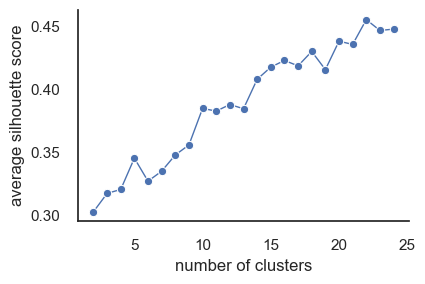

In [14]:
# plot silhouette scores
avg_silhouette_score_plot(silhouette_scores=avg_silhouette_scores, x='n_clusters', y="silhouette_score"
                          , font_scale=1, title=f"kmeans_avg_silhouette_score_tunning"
                          , save_path=f"{clustering_folder}", marker='o', linewidth=1, kind="line", height=3, aspect=1.5)

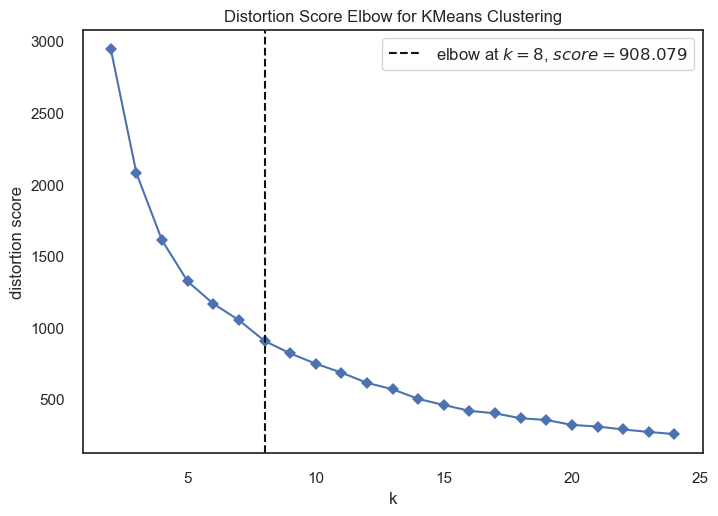

In [15]:
kmeans_distorsion(data=features, save_path=f"{clustering_folder}")

For n_clusters = 4 The average silhouette_score is : 0.3207770105328477


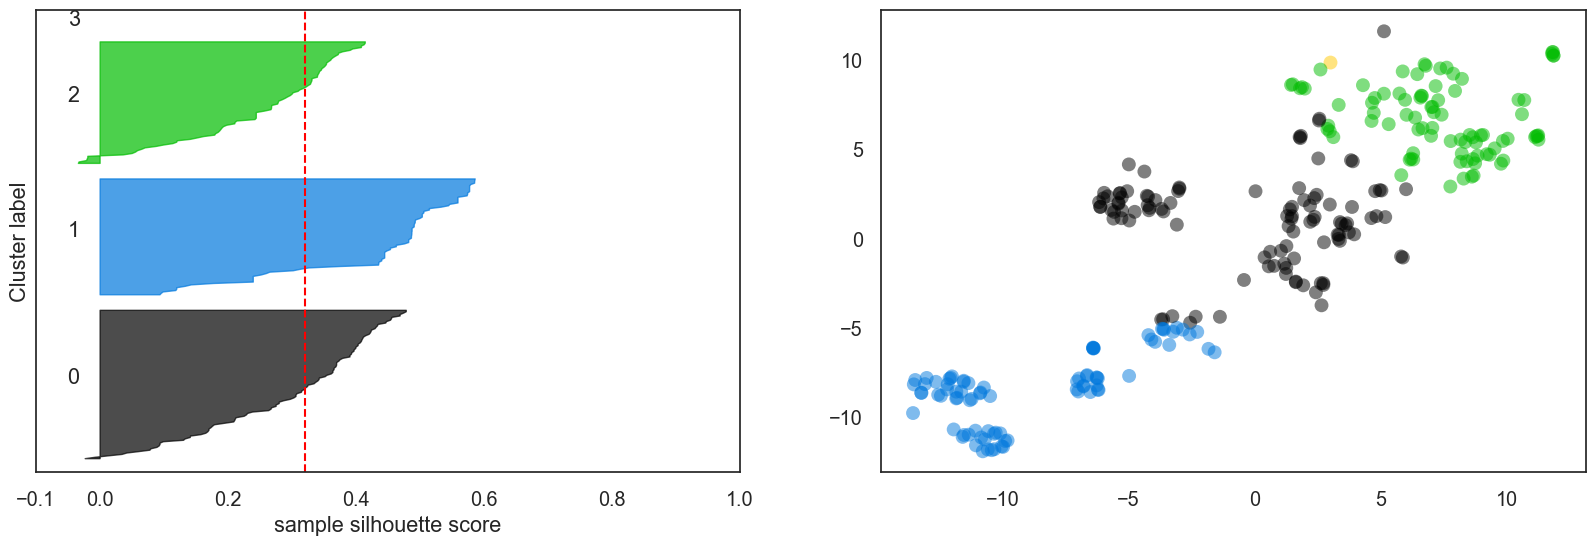

For n_clusters = 8 The average silhouette_score is : 0.34818417852374534


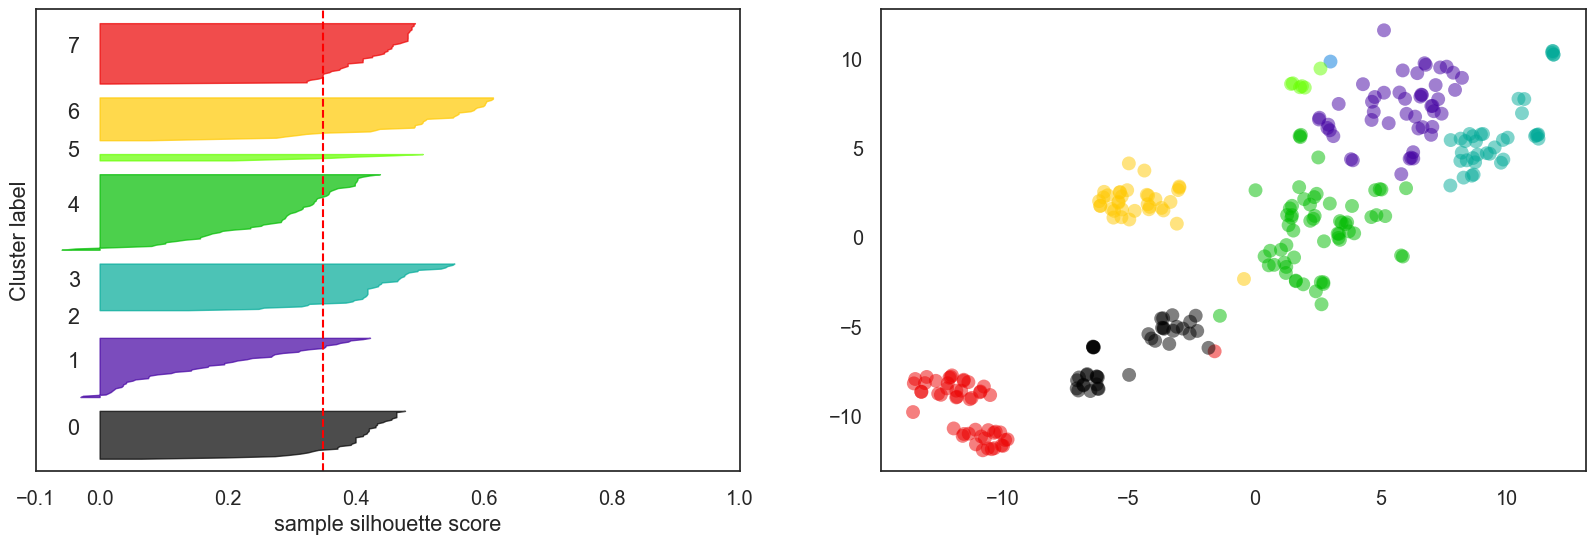

For n_clusters = 21 The average silhouette_score is : 0.4360239710124172


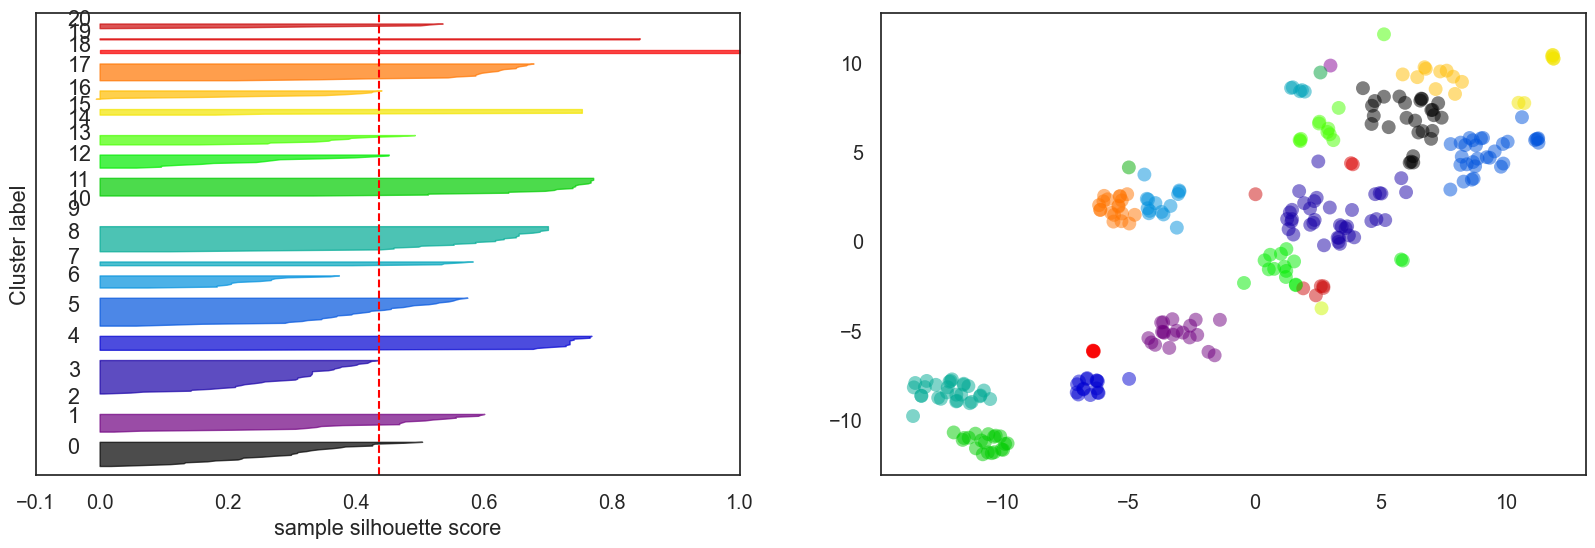

In [16]:
sample_silhouette_score_plot(X=features, data_2d=data_2d_tsne, sample_silhouette_scores=sample_silhouette_scores
                 , avg_silhouette_scores=avg_silhouette_scores
                 , range_n_clusters=[4, 8, 21], figsize=(5, 5), font_scale=1.3
                 , annotate = False
                 , save=True
                 , title=f"kmeans_sample_silhouette_score_tunning"
                 , save_path=f"{clustering_folder}",
                )

In [17]:
# perfrom final clustering
# n_clusters = 4

for n_clusters in [8]:
    k_means, dataset_clustered, data_labels = kmeans(data=features, n_clusters=n_clusters, title=f"kmeans_n_clusters={n_clusters}"
           , save_path=f"{clustering_folder}")
    
    print(data_labels["label"].unique())

For n_clusters = 8 The average silhouette_score is : 0.34818417852374534
Preview kmeans clustering: 
                                                                      ela_distr.skewness  \
f0                f1                        alpha    benchmark_suite                       
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1                       -0.138283   
                                            0.868363 BS1                        0.069438   
bbob_f003_i01_d05 shifted-bbob_f009_i01_d05 0.001103 BS1                        0.198626   
                  shifted-bbob_f023_i01_d05 0.785410 BS1                       -0.477445   
bbob_f017_i01_d05 shifted-bbob_f003_i01_d05 0.345955 BS1                       -0.227727   

                                                                      ela_meta.lin_simple.adjr2  \
f0                f1                        alpha    benchmark_suite                              
bbob_f004_i01_d05 shifted-bbob_f003_i01_d05 0.895461 BS1

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

4
1
3
6
5
0
7
2


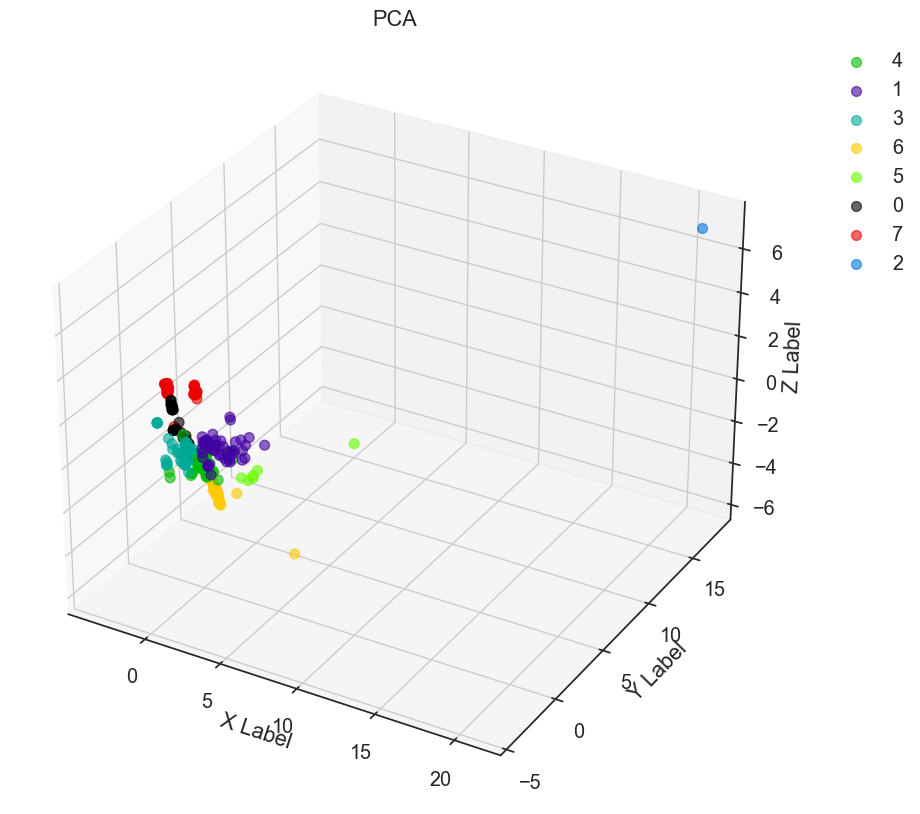

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

4
1
3
6
5
0
7
2


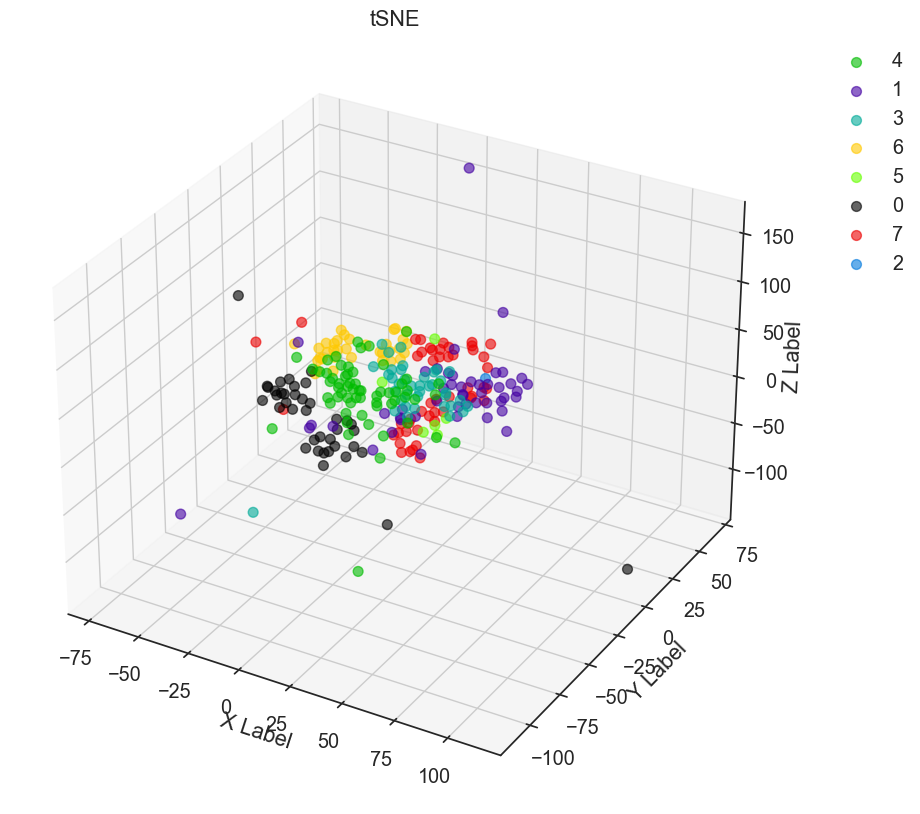

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

4
1
3
6
5
0
7
2


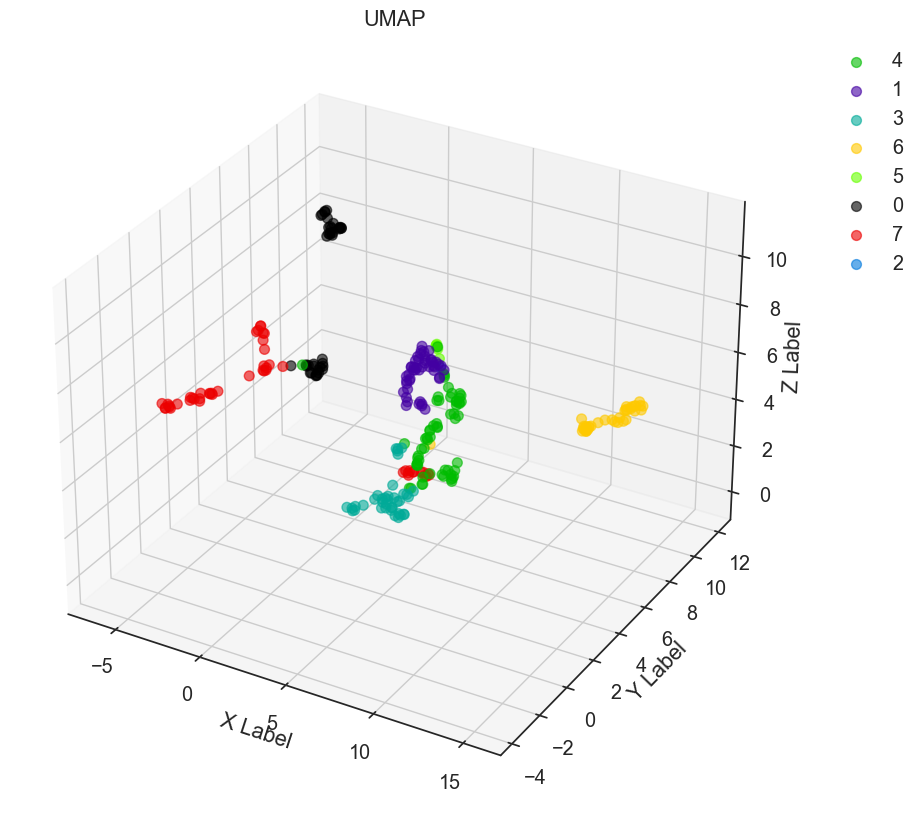

In [18]:
# plot labels in 3D
colors = ["tab:red","tab:blue","tab:green","tab:purple"]
labels = ["PCA", "tSNE", "UMAP"]

for k in range(len(data_3ds)):
    data = data_3ds[k]
    data = pd.merge(data.reset_index(), data_labels, how='left', on=["benchmark_suite", "f0", "f1", "alpha"])
    
    # scatter plot 2d
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection='3d')
    ax.grid()

    # plot
    for label in data_labels["label"].unique():
        print(label)
        
        data_temp = data[data["label"]==label].reset_index()
        
        x = data_temp["dim0"].values
        y = data_temp["dim1"].values
        z = data_temp["dim2"].values

        ax.scatter(x, y, z, s=50,  marker='o', c=cm.nipy_spectral(np.divide(label, len(data_labels["label"].unique()))), label=label, alpha=0.6)
        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
    
    ax.set_title(labels[k])
    
    # legend
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2)
    
    # save
    plt.savefig(f"{clustering_folder}/labels_3d_{labels[k]}.png", bbox_inches='tight', dpi=300)

    plt.show()
    plt.close()